Импортируем пакеты настриваем графики.

In [751]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams 
rcParams['figure.figsize'] = 12, 6
matplotlib.style.use('fivethirtyeight')

Функция заменяющая float64 на float32 и int64 на int32.

In [752]:
def change_to_float32_int32(data):
    '''
    Функция меняет данные с flaot 64 на float32 и int64 на int32 во всем datasete
    '''
    for i in data.columns:
        if data[i].dtype == 'float64':
            data[i] = data[i].astype('float32')
        elif data[i].dtype == 'int64':
            data[i] = data[i].astype('int32')
    return data

In [753]:
def change_to_median(data, column, sign, value):
    '''
    Функция принимает датаферейм, название столбца, знак , значение.
    изменяет в нем все выбросы меньше или больше значения на медиану данных без этих выбросов.
    так же заполняет медианой все пустые данные в этом столбце на медиану.
    '''
    if sign == '<':
        data.loc[data[column] < value, column] = np.nan
    elif sign == '>':
        data.loc[data[column] > value, column] = np.nan
    data[column].fillna(data[column].median(), inplace=True)
     

Импортируем тренировочный датасет, и датасет для предсказания.

In [754]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


Создаем заготовку для предсказния. 

In [755]:
final_result = pd.DataFrame(df_test['Id'], columns=['Id'])

In [756]:
final_result.head()

,Id
0,725
1,15856
2,5480
3,15664
4,14275


Начинаем разбираться с данными

Data fields
- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Меняем все на int32 и float32

In [758]:
df = change_to_float32_int32(df)

Все манипуляции мы так же должны будем провести в тестовом сете.

У нас есть признаки с неполными данными "LifeSquare" -  7887 и "Healthcare_1" - 5202.

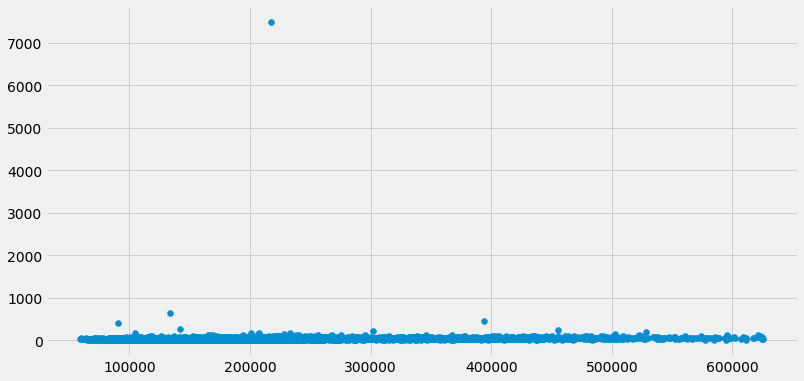

In [759]:
plt.scatter(df['Price'], df['LifeSquare'])

У нас тут явно выброс, заменим его и отсутствующие значения на медиану

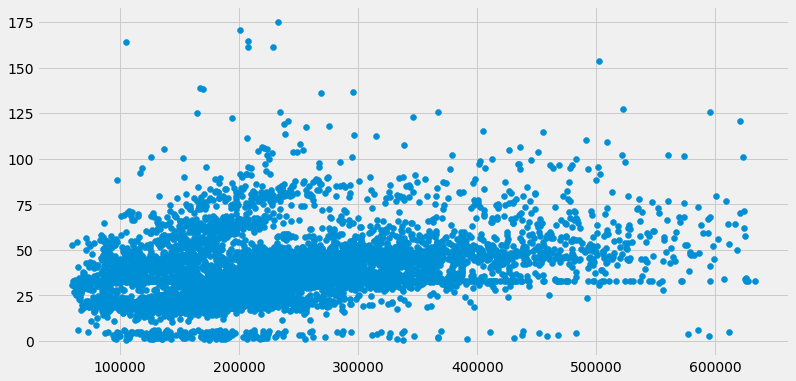

In [760]:
change_to_median(df, 'LifeSquare', '>', 200)

change_to_median(df_test, 'LifeSquare', '>', 200)

plt.scatter(df['Price'], df['LifeSquare'])

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int32  
 1   DistrictId     10000 non-null  int32  
 2   Rooms          10000 non-null  float32
 3   Square         10000 non-null  float32
 4   LifeSquare     10000 non-null  float32
 5   KitchenSquare  10000 non-null  float32
 6   Floor          10000 non-null  int32  
 7   HouseFloor     10000 non-null  float32
 8   HouseYear      10000 non-null  int32  
 9   Ecology_1      10000 non-null  float32
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int32  
 13  Social_2       10000 non-null  int32  
 14  Social_3       10000 non-null  int32  
 15  Healthcare_1   5202 non-null   float32
 16  Helthcare_2    10000 non-null  int32  
 17  Shops_1        10000 non-null  int32  
 18  Shops_2

у нас есть явная анамалия внизу, также отправим ее в медиану.

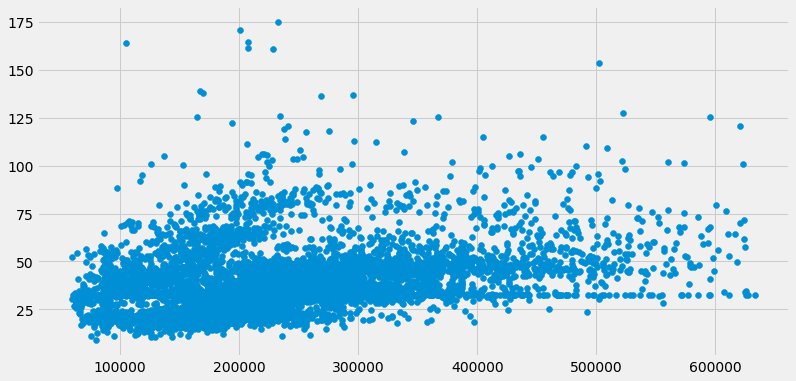

In [762]:
change_to_median(df, 'LifeSquare', '<', 7)

change_to_median(df_test, 'LifeSquare', '<', 7)

plt.scatter(df['Price'], df['LifeSquare'])

Посмотрим Healthcare_1

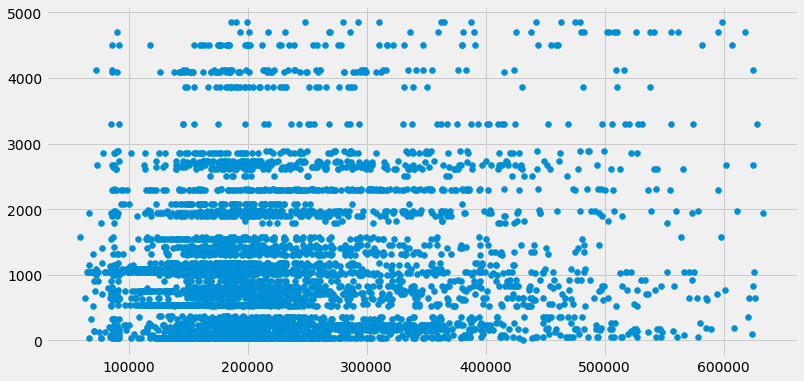

In [763]:
plt.scatter(df['Price'], df['Healthcare_1'])

Не особо похоже что тут есть какието зависимости от цены, но все же заменим пропуски на медиану и остаивм его как есть

In [764]:
df['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median(), inplace=True)

In [765]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839523,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315712,21.058718,1.136859,41.774879,52.513309,65.900627,6.410652e+02
LifeSquare,10000.0,35.895123,14.889241,8.822989,27.648769,32.760109,41.396902,1.748371e+02
KitchenSquare,10000.0,6.273300,28.561113,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.776192,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119026,0.000000,0.017647,0.075424,0.195781,5.218670e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8EBD4DA48>,
      dtype=object)

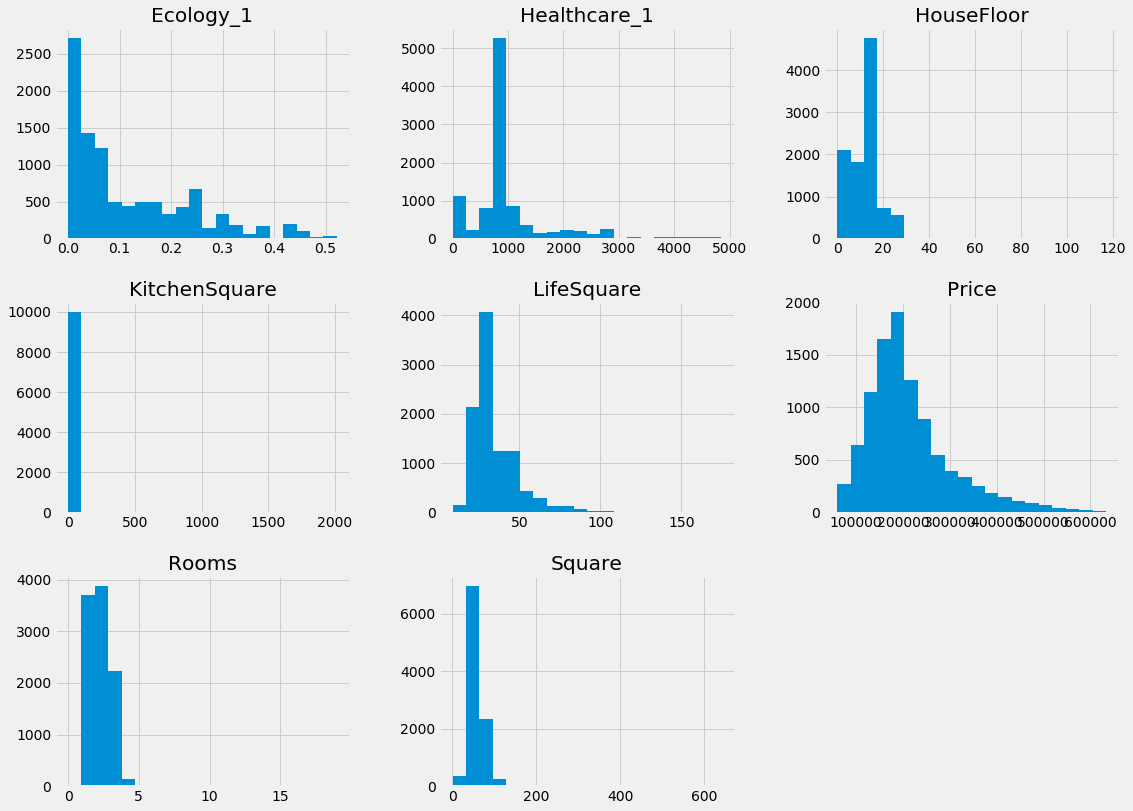

In [766]:
df_num_features = df.select_dtypes(include='float32')
df_num_features.hist(bins=20, figsize=(17,13))

По графикам понятно, что много данных с выбросам, будем разбираться со всеми по отдельности.

Rooms

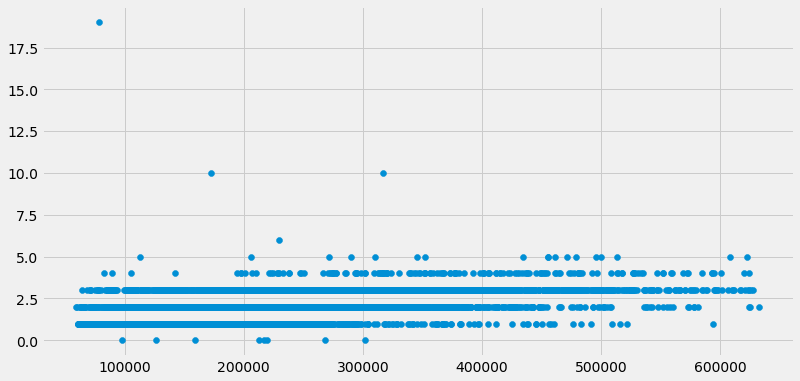

In [767]:
plt.scatter(df['Price'], df['Rooms'])

явно есть выбросы большого числа комнат по малой цене что врядли возможно, медиана в бой. Ноль комнат тоже не бывает.

In [768]:
change_to_median(df, 'Rooms', '>', 10)
change_to_median(df, 'Rooms', '<', 1)

change_to_median(df_test, 'Rooms', '>', 10)
change_to_median(df_test, 'Rooms', '<', 1)


Square

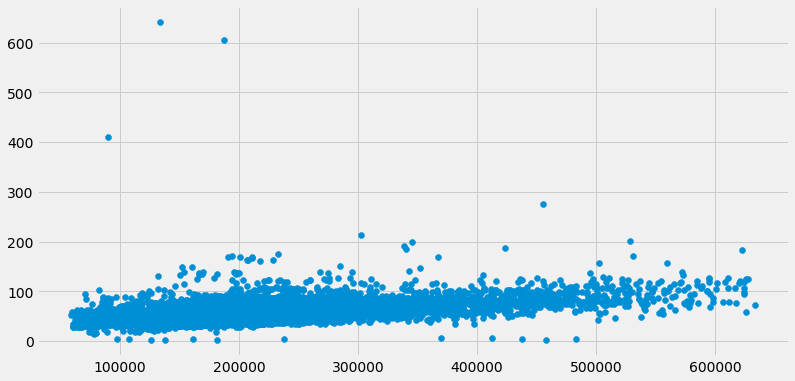

In [769]:
plt.scatter(df['Price'], df['Square'])

Тут явно есть слишком маленькие значения и выброс все в медиану гоним.


In [770]:
change_to_median(df, 'Square', '>',250)
change_to_median(df, 'Square', '<', 7)

change_to_median(df_test, 'Square', '>', 250)
change_to_median(df_test, 'Square', '<', 7)

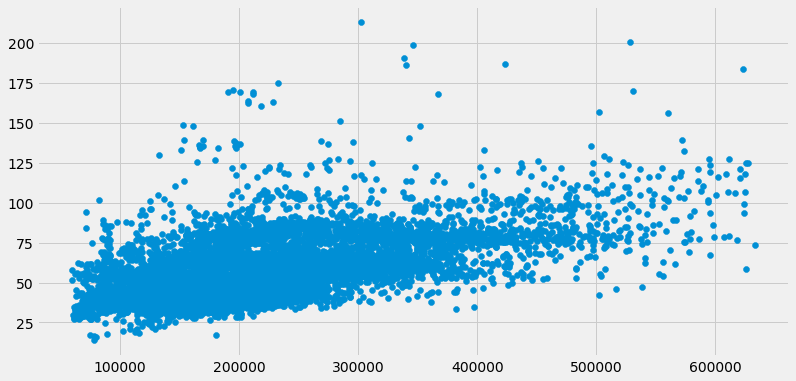

In [771]:
plt.scatter(df['Price'], df['Square'])

KitchenSquare

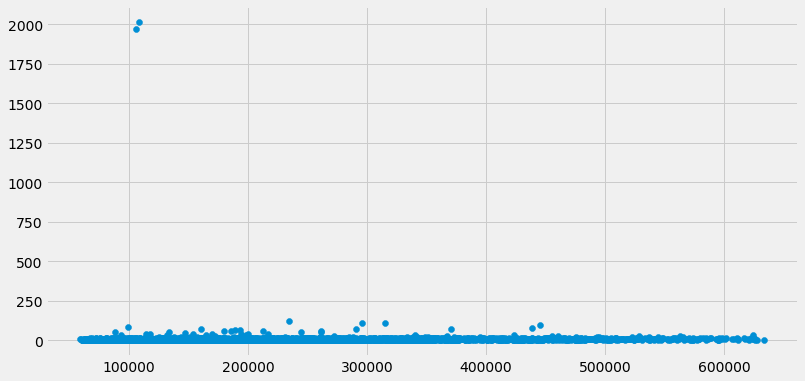

In [772]:
plt.scatter(df['Price'], df['KitchenSquare'])

Выбросы, везде выбросы

In [773]:
change_to_median(df, 'KitchenSquare', '>',250)

change_to_median(df_test, 'KitchenSquare', '>', 250)

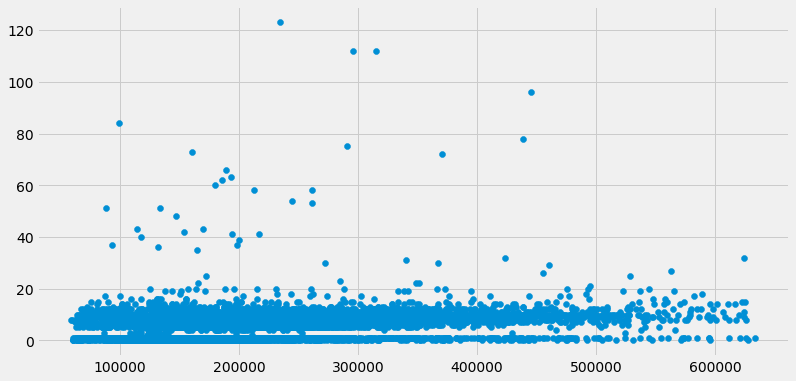

In [774]:
plt.scatter(df['Price'], df['KitchenSquare'])

In [775]:
df[df['KitchenSquare'] < 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3161.0,8344.785195,4828.672092,6.000000,4102.000000,8398.000000,12451.000000,16782.000000
DistrictId,3161.0,27.977222,24.980286,0.000000,6.000000,26.000000,34.000000,190.000000
Rooms,3161.0,1.777602,0.770626,1.000000,1.000000,2.000000,2.000000,5.000000
Square,3161.0,60.168182,19.938021,16.117155,43.790432,58.521099,69.399818,212.932358
LifeSquare,3161.0,40.081203,16.171713,8.822989,32.760109,32.760109,39.857262,170.713654
KitchenSquare,3161.0,0.780766,0.416840,0.000000,1.000000,1.000000,1.000000,2.000000
Floor,3161.0,9.839924,5.730857,1.000000,5.000000,9.000000,14.000000,37.000000
HouseFloor,3161.0,12.893072,8.577387,0.000000,3.000000,17.000000,17.000000,117.000000
HouseYear,3161.0,1987.612148,17.447938,1955.000000,1977.000000,1977.000000,2014.000000,2020.000000
Ecology_1,3161.0,0.106386,0.114508,0.000000,0.007122,0.072158,0.195781,0.521867


Достаточно много квартир с кухней меньше 3х метров, причем не похоже, что это сильно влияет на цену. Так что в медиану отправляется. Вроде нету смысла выделять ее в отдельный признак(но общей картине может помешать).

In [776]:
change_to_median(df, 'KitchenSquare', '<', 3)
change_to_median(df_test, 'KitchenSquare', '<', 3)
df.KitchenSquare.median()

8.0

In [777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int32  
 1   DistrictId     10000 non-null  int32  
 2   Rooms          10000 non-null  float32
 3   Square         10000 non-null  float32
 4   LifeSquare     10000 non-null  float32
 5   KitchenSquare  10000 non-null  float32
 6   Floor          10000 non-null  int32  
 7   HouseFloor     10000 non-null  float32
 8   HouseYear      10000 non-null  int32  
 9   Ecology_1      10000 non-null  float32
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int32  
 13  Social_2       10000 non-null  int32  
 14  Social_3       10000 non-null  int32  
 15  Healthcare_1   10000 non-null  float32
 16  Helthcare_2    10000 non-null  int32  
 17  Shops_1        10000 non-null  int32  
 18  Shops_2

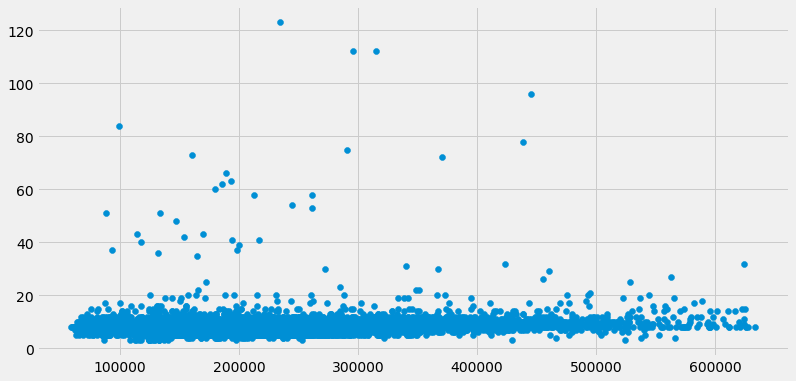

In [778]:
plt.scatter(df['Price'], df['KitchenSquare'])

Floor

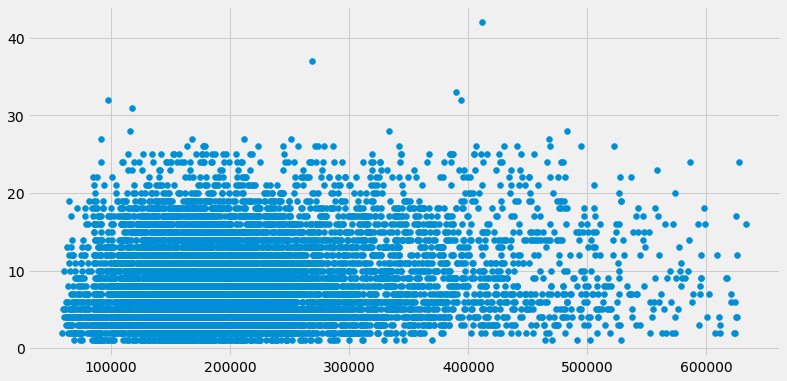

In [779]:
plt.scatter(df['Price'], df['Floor'])

Вроде все гуд без выбросов.Можно подумать о том что бы сделать перывй этаж признаком.

In [780]:
# df.loc[df['Floor'] != 1,'Floor'] = 0
# df['Floor'] = df['Floor'].astype('str')

# df_test.loc[df_test['Floor'] != 1,'Floor'] = 0
# df_test['Floor'] = df_test['Floor'].astype('str')
# Получилось так себе, вносит очень маленькую поользу. В итоге оставил как есть.


HouseFloor

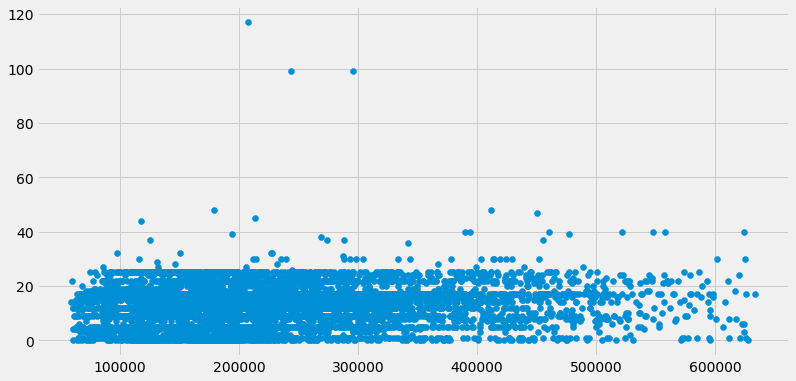

In [781]:
plt.scatter(df['Price'], df['HouseFloor'])

In [782]:
df[df['HouseFloor'] <= 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,269.0,8048.899628,4787.698618,184.000000,3791.000000,8139.000000,12136.000000,16679.000000
DistrictId,269.0,38.535316,28.136456,1.000000,27.000000,27.000000,62.000000,169.000000
Rooms,269.0,1.836431,0.807620,1.000000,1.000000,2.000000,2.000000,5.000000
Square,269.0,63.665382,22.566763,26.553188,45.970814,60.001129,77.989449,170.016876
LifeSquare,269.0,35.521534,11.651966,15.894112,32.760109,32.760109,32.760109,138.910187
KitchenSquare,269.0,8.100371,0.560816,8.000000,8.000000,8.000000,8.000000,13.000000
Floor,269.0,9.026022,5.487713,1.000000,5.000000,8.000000,12.000000,26.000000
HouseFloor,269.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HouseYear,269.0,1979.330855,9.290814,1977.000000,1977.000000,1977.000000,1977.000000,2018.000000
Ecology_1,269.0,0.085194,0.083261,0.000000,0.017647,0.072158,0.075779,0.437885


Дом нулевой высоты весьма странно, закинем эти значения в медианой

In [783]:
change_to_median(df, 'HouseFloor', '<', 1)
change_to_median(df_test, 'HouseFloor', '<', 1)

HouseYear

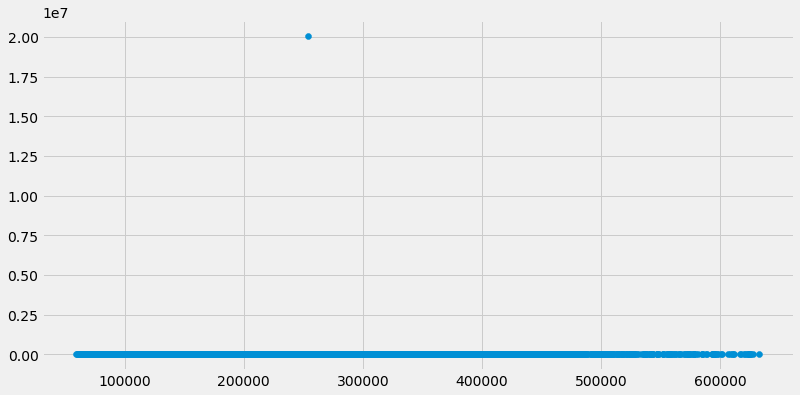

In [784]:
plt.scatter(df['Price'], df['HouseYear'])

In [785]:
df[df['HouseYear'] > 2020] #заменяем  медианой, выбросов вниз нету, это видно из дескрайби

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250
4189,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375


In [786]:
change_to_median(df, 'HouseYear', '>', 2020)
change_to_median(df_test, 'HouseYear', '>', 2020)

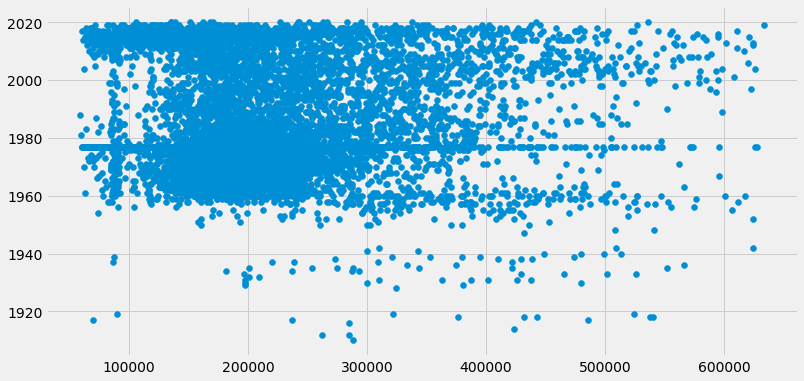

In [787]:
plt.scatter(df['Price'], df['HouseYear'])

Ecology_1, Ecology_2, Ecology_3

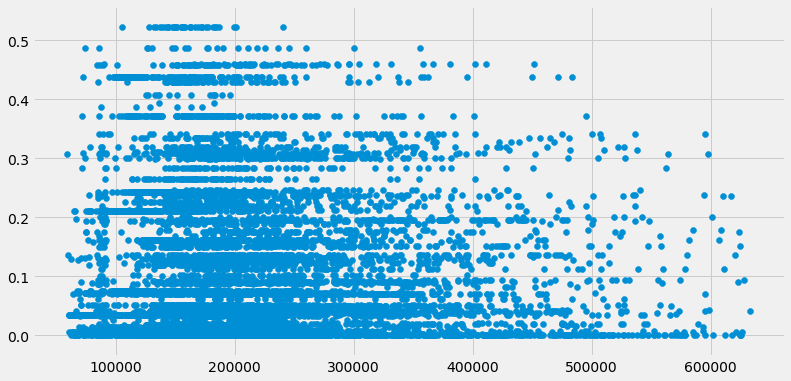

In [788]:
plt.scatter(df['Price'], df['Ecology_1']) # какието данные, их весьма сложно оценить на правдивость.

Ecology_2, Ecology_3 имеют 2 категории, пусть остаются

Social

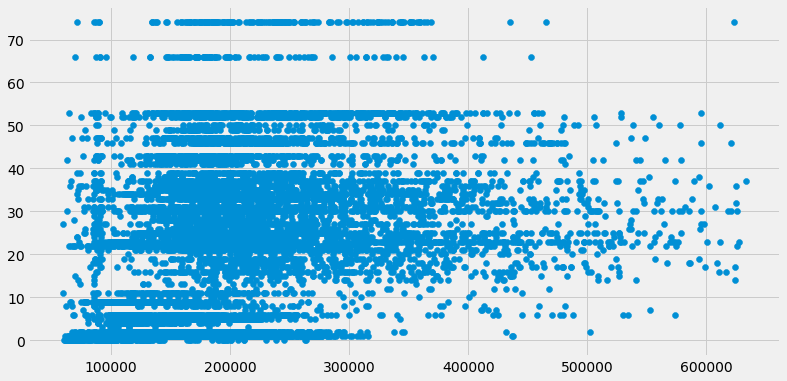

In [789]:
plt.scatter(df['Price'], df['Social_1'])

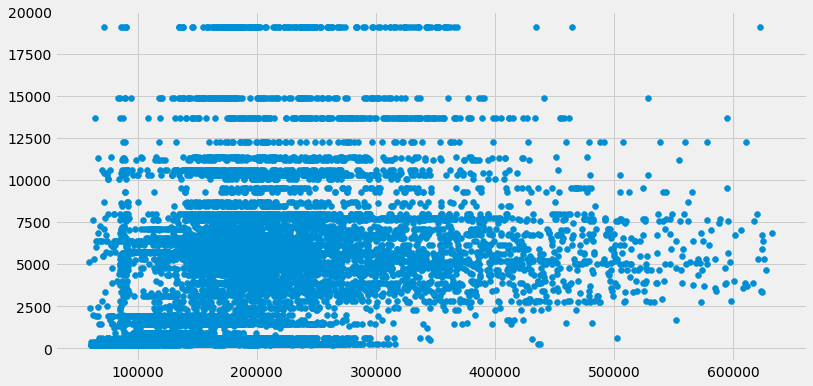

In [790]:
plt.scatter(df['Price'], df['Social_2'])

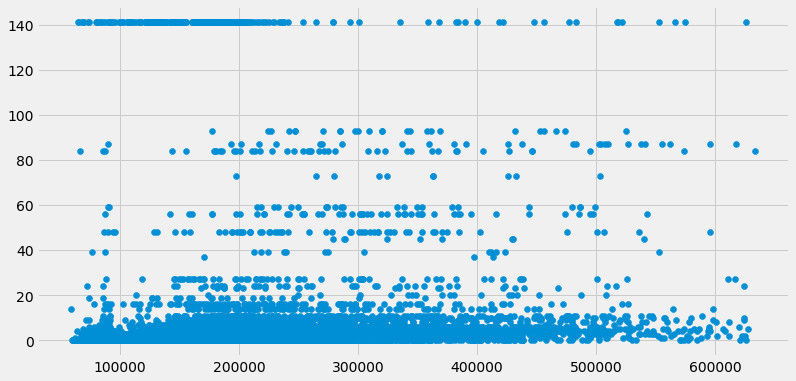

In [791]:
plt.scatter(df['Price'], df['Social_3'])

Крайне сложно понять, что это и какой вклад вносят. Не понятно есть ли выбросы или неправильные данные.

Healthcare_2

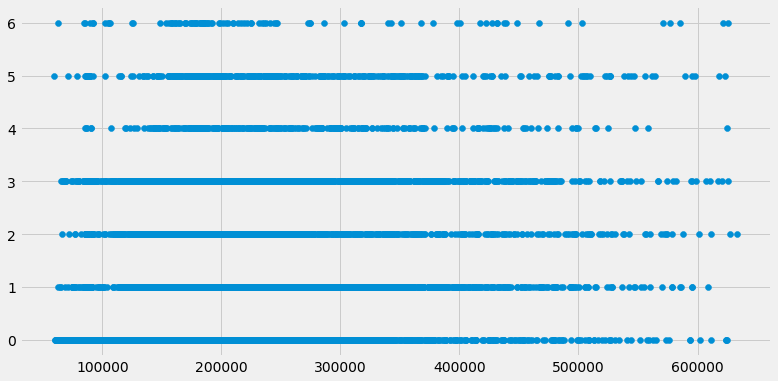

In [792]:
plt.scatter(df['Price'], df['Helthcare_2'])

In [793]:
df['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

построим новую фитчу на основе смедианной цены по одному каждому уровню Healthcare_2

In [794]:
df_temp_1 = pd.DataFrame(df[['Helthcare_2','Price']])
df_temp_1.rename(columns={'Price': 'MedDHC2Price'}, inplace=True)
df_temp_1

,Helthcare_2,MedDHC2Price
0,0,184966.937500
1,1,300009.437500
2,1,220925.906250
3,0,175616.234375
4,2,150226.531250
...,...,...
9995,3,196684.312500
9996,0,189050.296875
9997,0,159143.812500
9998,2,181595.343750


In [795]:
df_temp_1 = df_temp_1.groupby(by='Helthcare_2').median()
df_temp_1 = pd.DataFrame(df_temp_1)
df_temp_1

,MedDHC2Price
Helthcare_2,
0,169383.062500
1,216133.468750
2,198882.375000
3,204197.968750
4,240621.375000
5,243660.343750
6,201222.828125


In [796]:
df = df.merge(df_temp_1, on='Helthcare_2')

In [797]:
df_test = df_test.merge(df_temp_1, on='Helthcare_2', how='left')

DistrictId

создадим то же самое что и с Healthcare_2, только заменим медианой средние значения на тех участках где мало сделок.

In [798]:
df_temp = pd.DataFrame(df[['DistrictId','Price']])
df_temp.rename(columns={'Price': 'MedDistPrice'}, inplace=True)
df_temp

,DistrictId,MedDistPrice
0,35,184966.937500
1,58,175616.234375
2,59,215898.453125
3,74,221244.156250
4,1,229102.796875
...,...,...
9995,31,214312.156250
9996,124,180351.781250
9997,75,205516.953125
9998,124,166649.250000


In [799]:
df_temp = df_temp.groupby(by='DistrictId').mean()
df_temp = pd.DataFrame(df_temp)

In [800]:
sells_in_district = pd.DataFrame({'count': df['DistrictId'].value_counts()})
sells_in_district.index.name = 'DistrictId'


In [801]:
sells_in_district = sells_in_district[sells_in_district['count'] > 10]

In [802]:
sells_in_district.tail(10)

,count
DistrictId,
104,11
168,11
40,11
148,11
161,11
143,11
142,11
4,11
126,11


In [803]:
df_temp = df_temp.merge(sells_in_district, on='DistrictId')
df_temp.head(10)

,MedDistPrice,count
DistrictId,,
0,195295.593750,48
1,187805.406250,652
2,243688.625000,78
3,179905.015625,82
4,300096.687500,11
5,238650.593750,34
6,166127.140625,511
7,243154.828125,92
8,214455.078125,142


In [804]:
df_temp.drop('count', axis=1, inplace=True)

In [805]:
df = df.merge(df_temp, on='DistrictId', how='left')

In [806]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,MedDHC2Price,MedDistPrice
0,14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969.0,0.089040,...,33,7976,5,900.0,0,11,B,184966.937500,169383.0625,219720.062500
1,5809,58,2.0,53.352982,52.731510,9.0,8,17.0,1977.0,0.437885,...,23,5735,3,1084.0,0,5,B,175616.234375,169383.0625,162287.312500
2,12915,59,3.0,80.384476,46.683720,12.0,5,17.0,2011.0,0.309479,...,35,7715,4,990.0,0,6,B,215898.453125,169383.0625,322216.312500
3,11993,74,2.0,80.312927,32.760109,8.0,14,14.0,1977.0,0.075779,...,6,1437,3,900.0,0,2,B,221244.156250,169383.0625,210696.109375
4,5172,1,2.0,64.511436,32.760109,8.0,9,17.0,1977.0,0.007122,...,1,264,0,900.0,0,1,B,229102.796875,169383.0625,187805.406250


In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int32  
 1   DistrictId     10000 non-null  int32  
 2   Rooms          10000 non-null  float32
 3   Square         10000 non-null  float32
 4   LifeSquare     10000 non-null  float32
 5   KitchenSquare  10000 non-null  float32
 6   Floor          10000 non-null  int32  
 7   HouseFloor     10000 non-null  float32
 8   HouseYear      10000 non-null  float64
 9   Ecology_1      10000 non-null  float32
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int32  
 13  Social_2       10000 non-null  int32  
 14  Social_3       10000 non-null  int32  
 15  Healthcare_1   10000 non-null  float32
 16  Helthcare_2    10000 non-null  int32  
 17  Shops_1        10000 non-null  int32  
 18  Shops_2

In [808]:
df.fillna(df_temp['MedDistPrice'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int32  
 1   DistrictId     10000 non-null  int32  
 2   Rooms          10000 non-null  float32
 3   Square         10000 non-null  float32
 4   LifeSquare     10000 non-null  float32
 5   KitchenSquare  10000 non-null  float32
 6   Floor          10000 non-null  int32  
 7   HouseFloor     10000 non-null  float32
 8   HouseYear      10000 non-null  float64
 9   Ecology_1      10000 non-null  float32
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int32  
 13  Social_2       10000 non-null  int32  
 14  Social_3       10000 non-null  int32  
 15  Healthcare_1   10000 non-null  float32
 16  Helthcare_2    10000 non-null  int32  
 17  Shops_1        10000 non-null  int32  
 18  Shops_2

Делаем то же самое с тестовым датасетом. добавляем в енго фитчу и новые дистрикты заполняем медианой, средню цену берем из обущающего датасета.

In [809]:
columns_to_drop

['Id', 'DistrictId', 'Helthcare_2', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [810]:
df_test = df_test.merge(df_temp, on='DistrictId', how='left')
df_test.fillna(df_temp['MedDistPrice'].mean(), inplace=True)


Создаем Х и y для RandomForest, удаляя ненужные фитчи.

In [811]:
y = df['Price']
columns_to_drop = [
        'Price',
        'Id',
        'DistrictId',
        'Helthcare_2',
        "Ecology_2",
        "Ecology_3",
        'Shops_2'
]
X = df.drop(columns_to_drop, axis=1)
X = pd.get_dummies(X)


очищаем тестовый сет от ненужных фитч

In [812]:
columns_to_drop.remove('Price')
df_test = df_test.drop(columns_to_drop, axis=1)
df_test = pd.get_dummies(df_test)

In [813]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


Обучаем модель на параметрах которые получили в кроссвалидации(вконце ноутбука)

In [814]:
model = RandomForestRegressor(max_depth=16, n_estimators=1000, max_features=7, random_state=42)
# model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [815]:
df_test_pred = model.predict(df_test)

In [816]:
final_result['Price'] = df_test_pred
final_result[['Id','Price']].to_csv('predictions.csv', index=False)

In [817]:
final_result.columns

Index(['Id', 'Price'], dtype='object')

In [818]:
final_result.head()

,Id,Price
0,725,159333.426869
1,15856,225839.952756
2,5480,211468.622758
3,15664,303771.023206
4,14275,146353.623728


In [819]:
feature_importance = model.feature_importances_
feature_importance

array([0.11426492, 0.30719527, 0.06384087, 0.02533814, 0.02312516,
       0.02366335, 0.0326555 , 0.01941824, 0.04848885, 0.05049049,
       0.03543679, 0.01770596, 0.01281764, 0.00969284, 0.21586599])

<BarContainer object of 15 artists>

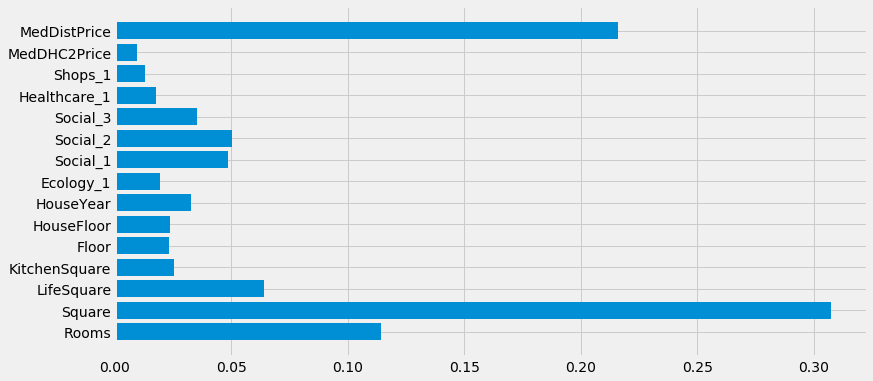

In [820]:
plt.barh(X.columns, feature_importance)

In [821]:
pd.DataFrame({'Feature_name': X.columns, 'feature_importance': feature_importance}).sort_values(by='feature_importance',ascending=False)

,Feature_name,feature_importance
1,Square,0.307195
14,MedDistPrice,0.215866
0,Rooms,0.114265
2,LifeSquare,0.063841
9,Social_2,0.050490
8,Social_1,0.048489
10,Social_3,0.035437
6,HouseYear,0.032656
3,KitchenSquare,0.025338
5,HouseFloor,0.023663


In [822]:
# parameters = {
#     'n_estimators': [500],
#     'max_features': np.arange(4, 13),
#     'max_depth': np.arange(16,17),
# }

# clf = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=parameters,
#     n_jobs=-1,
#     scoring='r2',
#     cv=5,
# )
# clf.fit(X, y)

In [823]:
# cv_results = pd.DataFrame(clf.cv_results_)
# param_columns = [
#     column
#     for column in cv_results.columns
#     if column.startswith('param_')
# ]

# score_columns = ['mean_test_score']

# cv_results = (cv_results[param_columns + score_columns]
#               .sort_values(by=score_columns, ascending=False))

# cv_results.head(10)